In [ ]:
# Naive Bayes Theorem

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv(r"C:\Users\School\Desktop\Datasets\Naive Bayes\diabetes.csv")

In [5]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.columns = map(str.lower, df.columns)

In [9]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [11]:
df.shape

(768, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies                 768 non-null int64
glucose                     768 non-null int64
bloodpressure               768 non-null int64
skinthickness               768 non-null int64
insulin                     768 non-null int64
bmi                         768 non-null float64
diabetespedigreefunction    768 non-null float64
age                         768 non-null int64
outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
df.describe().style.background_gradient(cmap='coolwarm')

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
count,768,768,768,768,768,768,768,768,768
mean,3.84505,120.895,69.1055,20.5365,79.7995,31.9926,0.471876,33.2409,0.348958
std,3.36958,31.9726,19.3558,15.9522,115.244,7.88416,0.331329,11.7602,0.476951
min,0,0,0,0,0,0,0.078,21,0
25%,1,99,62,0,0,27.3,0.24375,24,0
50%,3,117,72,23,30.5,32,0.3725,29,0
75%,6,140.25,80,32,127.25,36.6,0.62625,41,1
max,17,199,122,99,846,67.1,2.42,81,1


In [17]:
for col in df.columns.values:
    print(col, df[col].unique())

pregnancies [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
glucose [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
bloodpressure [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
skinthickness [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 9

In [21]:
df['outcome'].unique()

array([1, 0], dtype=int64)

In [26]:
df.corr()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bloodpressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skinthickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diabetespedigreefunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


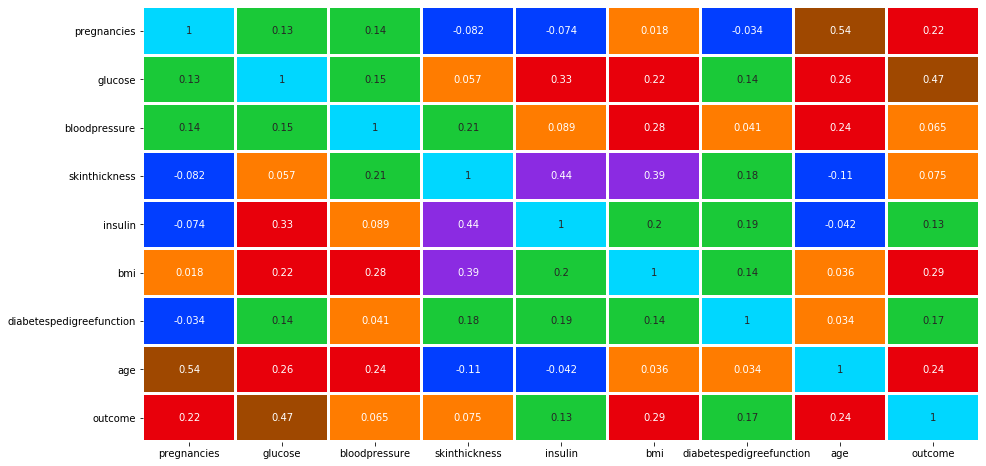

In [68]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cbar=None, linewidth=2, cmap=sns.color_palette('bright'))

C:\Users\School\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\School\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 1440x1440 with 0 Axes>

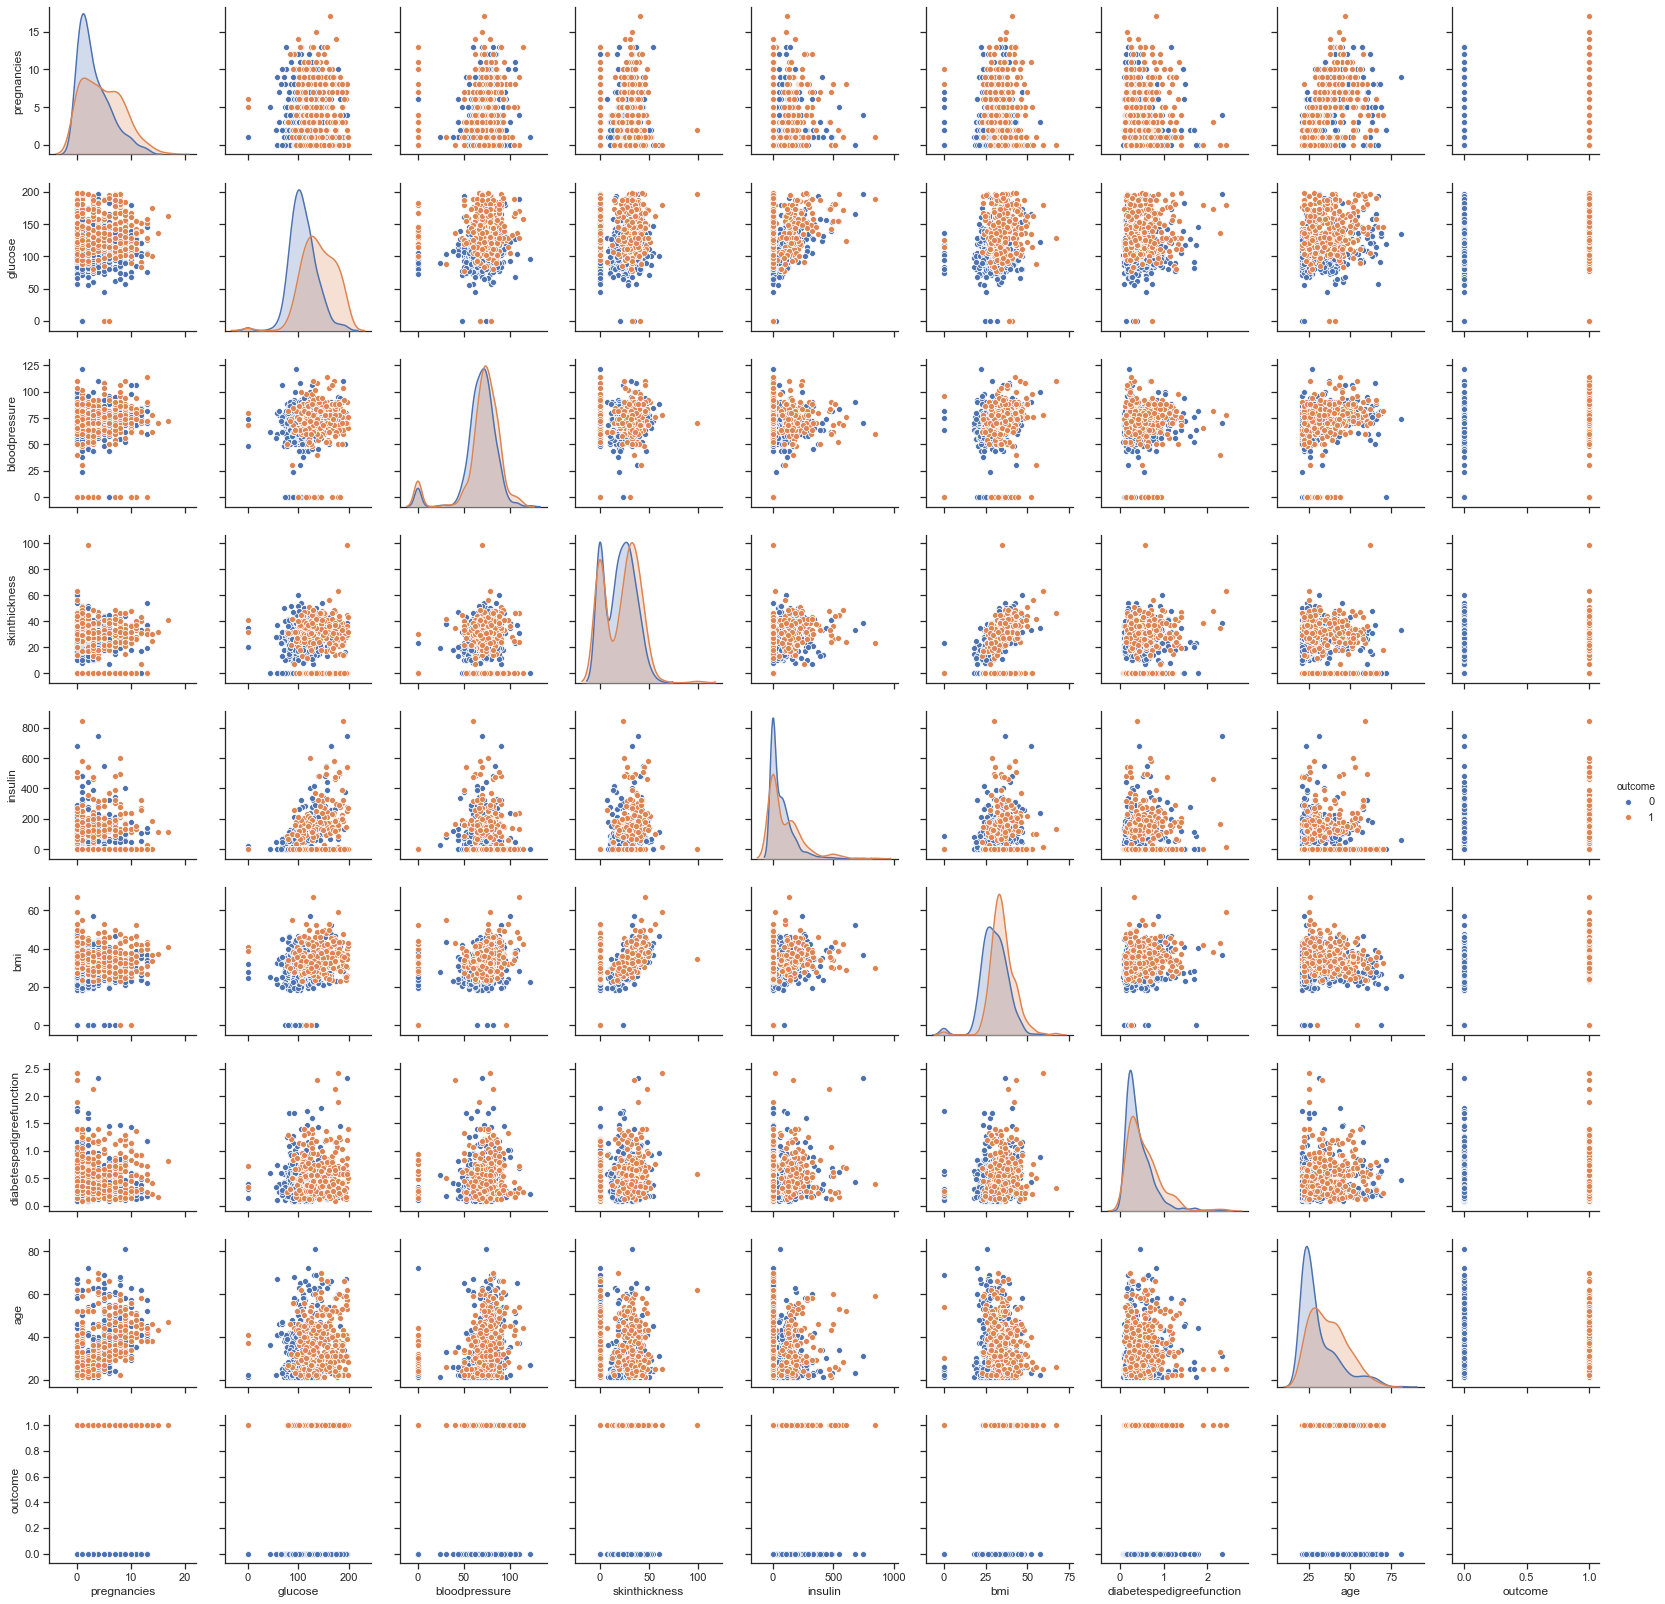

In [76]:
sns.set(style='ticks')
plt.figure(figsize=(20,20))

sns.pairplot(df, hue='outcome')

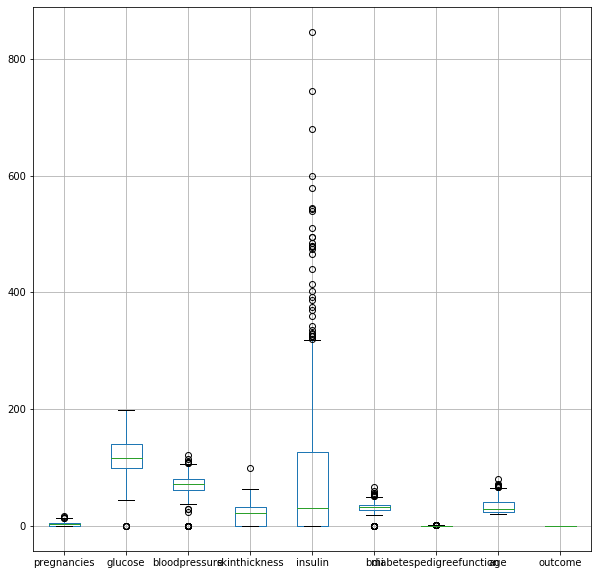

In [72]:
plt.figure(figsize=(10,10))
df.boxplot()

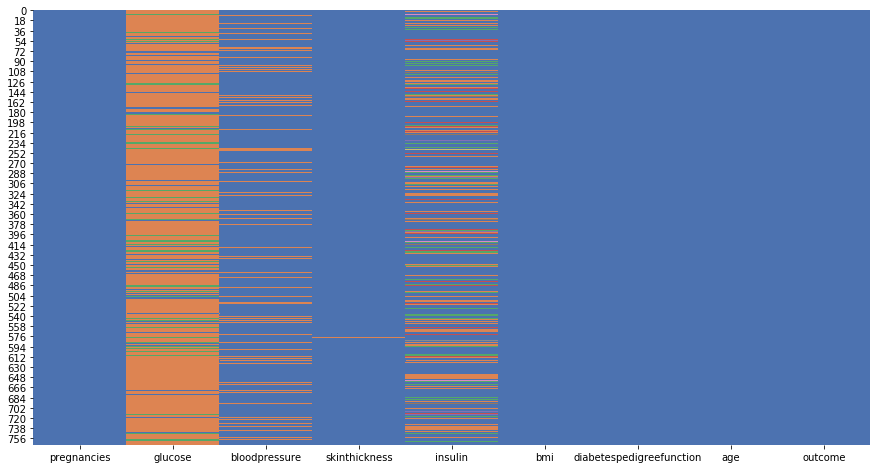

In [54]:
plt.figure(figsize=(15,8))
sns.heatmap(df, cbar=None, cmap=sns.color_palette('deep'))

In [46]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [57]:
df.groupby(['outcome'])['bmi', 'age'].sum()

,bmi,age
outcome,,
0,15152.1,15595
1,9418.2,9934


In [67]:
df.pivot_table(index=['outcome'] )

,age,bloodpressure,bmi,diabetespedigreefunction,glucose,insulin,pregnancies,skinthickness
outcome,,,,,,,,
0,31.190000,68.184000,30.304200,0.429734,109.980000,68.792000,3.298000,19.664000
1,37.067164,70.824627,35.142537,0.550500,141.257463,100.335821,4.865672,22.164179


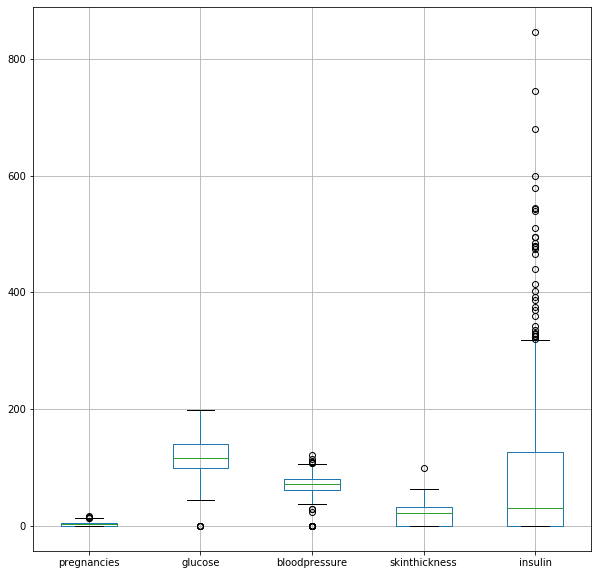

In [75]:
plt.figure(figsize=(10,10))
df.iloc[:, 0:5].boxplot()

In [81]:
df['insulin_log']= np.log(df['insulin'])

C:\Users\School\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


<Figure size 1440x1440 with 0 Axes>

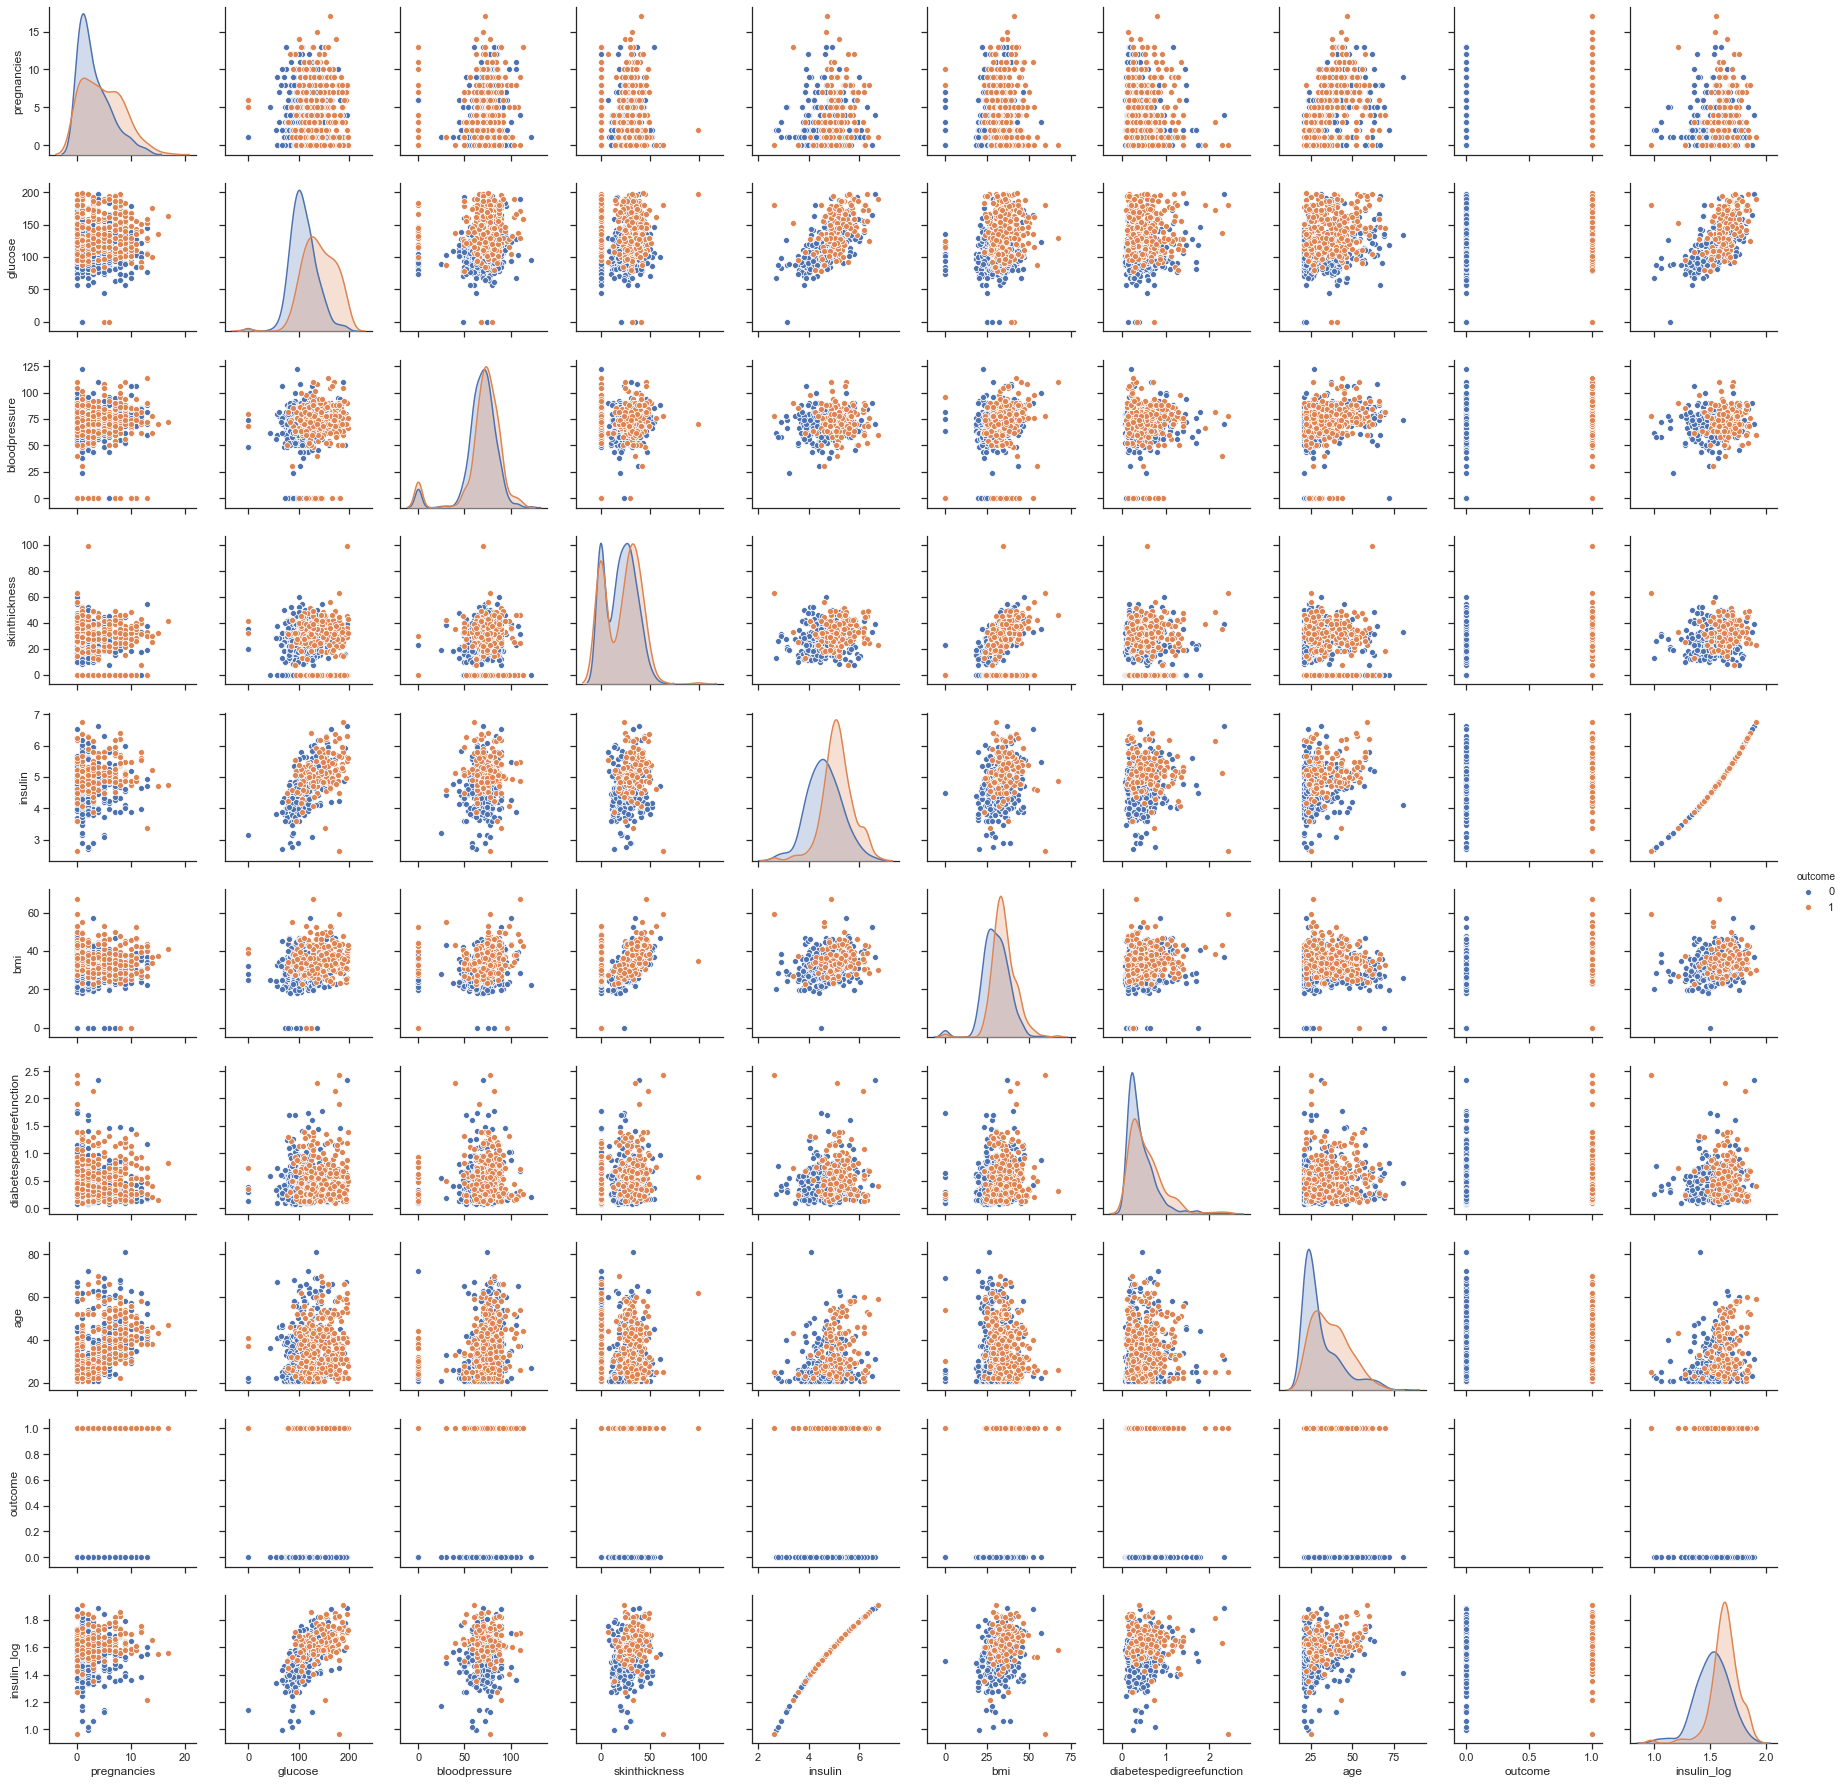

In [86]:
sns.set(style='ticks')
plt.figure(figsize=(20,20))

sns.pairplot(df, hue='outcome')

In [98]:
Y = df.loc[df.insulin > 0]

In [103]:
Y.iloc[:, 4:5]

,insulin
3,4.543295
4,5.123964
6,4.477337
8,6.297109
13,6.740519
14,5.164786
16,5.438079
18,4.418841
19,4.564348
20,5.459586


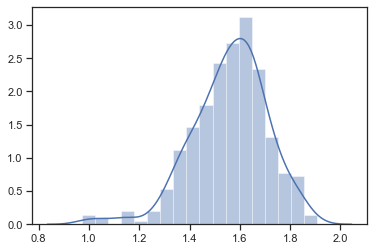

In [105]:
sns.distplot(np.log(Y.iloc[:, 4:5]))

In [127]:
df[df.insulin != 0]['insulin'].head()

0        -inf
1        -inf
2        -inf
3    4.543295
4    5.123964
Name: insulin, dtype: float64

In [110]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome', 'insulin_log'],
      dtype='object')

In [119]:
df[df.bmi < 200].loc[:10]

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome,insulin_log
0,6,148,72,35,-inf,33.6,0.627,50,1,NaN
1,1,85,66,29,-inf,26.6,0.351,31,0,NaN
2,8,183,64,0,-inf,23.3,0.672,32,1,NaN
3,1,89,66,23,4.543295,28.1,0.167,21,0,1.513652
4,0,137,40,35,5.123964,43.1,2.288,33,1,1.633928
5,5,116,74,0,-inf,25.6,0.201,30,0,NaN
6,3,78,50,32,4.477337,31.0,0.248,26,1,1.499028
7,10,115,0,0,-inf,35.3,0.134,29,0,NaN
8,2,197,70,45,6.297109,30.5,0.158,53,1,1.840091
9,8,125,96,0,-inf,0.0,0.232,54,1,NaN


In [133]:
df[df.bmi < 200].iloc[:, :3].head()

,pregnancies,glucose,bloodpressure
0,6,148,72
1,1,85,66
2,8,183,64
3,1,89,66
4,0,137,40


In [134]:
df[df.bmi < 200].iloc[:, :3].shape

(768, 3)

In [135]:
df[df.bmi < 200].iloc[:, 4:8].shape

(768, 4)

In [136]:
df[df.bmi < 200].iloc[:, 4:8].head()

,insulin,bmi,diabetespedigreefunction,age
0,-inf,33.6,0.627,50
1,-inf,26.6,0.351,31
2,-inf,23.3,0.672,32
3,4.543295,28.1,0.167,21
4,5.123964,43.1,2.288,33


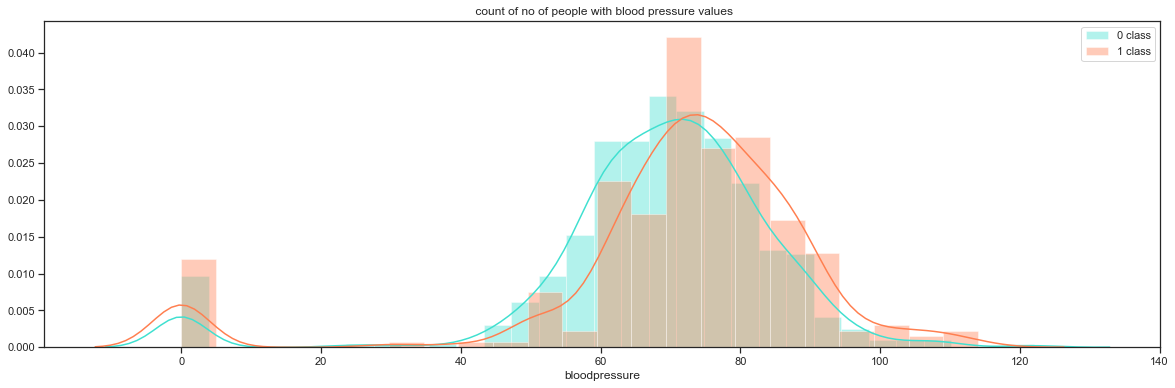

In [143]:
plt.figure(figsize =(20,6))
sns.distplot(df[df.outcome ==0]['bloodpressure'], color ='turquoise', label = '0 class')
sns.distplot(df[df.outcome ==1]['bloodpressure'], color ='coral', label = '1 class')
plt.legend()

plt.title(' count of no of people with blood pressure values')

plt.show()

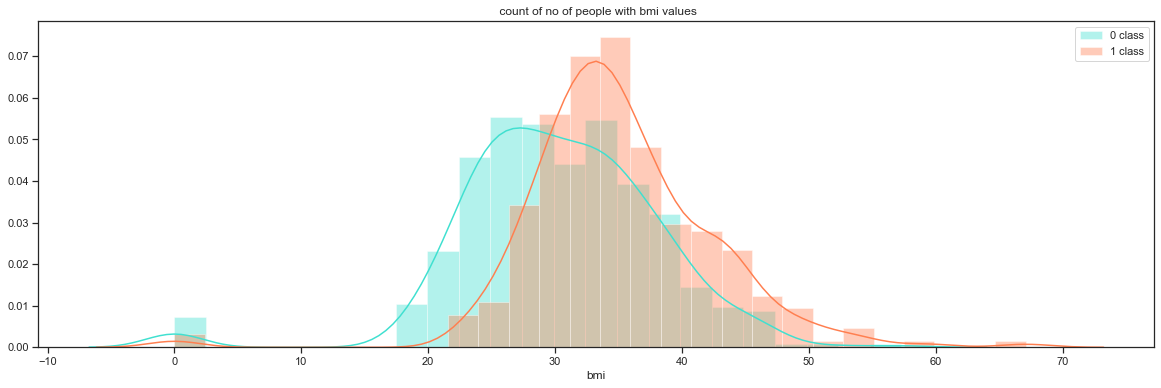

In [144]:
plt.figure(figsize =(20,6))

sns.distplot(df[df.outcome ==0]['bmi'], color ='turquoise', label = '0 class')

sns.distplot(df[df.outcome ==1]['bmi'], color ='coral', label = '1 class')

plt.legend()

plt.title(' count of no of people with bmi values')

plt.show()

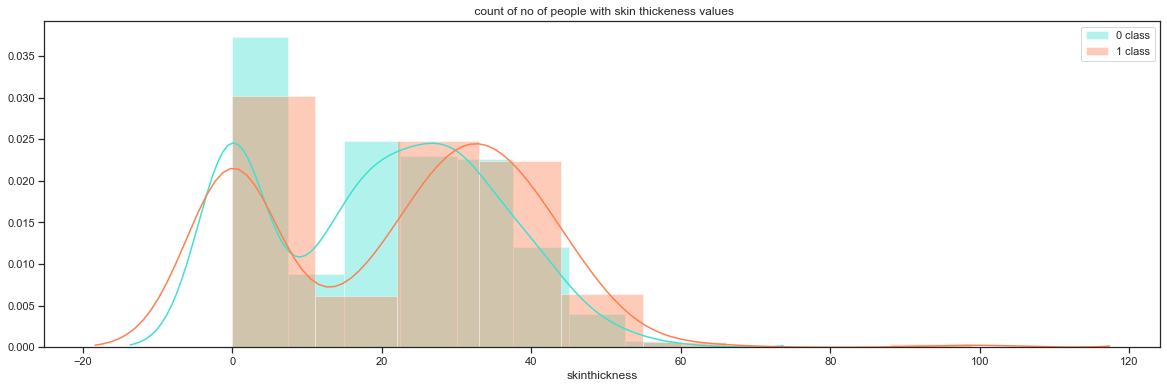

In [146]:
plt.figure(figsize =(20,6))

sns.distplot(df[df.outcome ==0]['skinthickness'], color ='turquoise', label = '0 class')

sns.distplot(df[df.outcome ==1]['skinthickness'], color ='coral', label = '1 class')

plt.legend()

plt.title(' count of no of people with skin thickeness values')

plt.show()

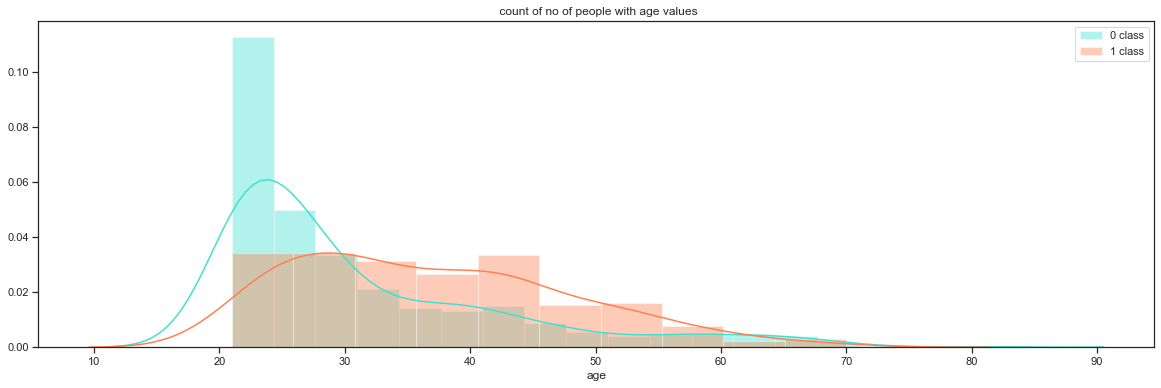

In [147]:
plt.figure(figsize =(20,6))

sns.distplot(df[df.outcome ==0]['age'], color ='turquoise', label = '0 class')

sns.distplot(df[df.outcome ==1]['age'], color ='coral', label = '1 class')

plt.legend()

plt.title(' count of no of people with age values')

plt.show()

In [149]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome', 'insulin_log'],
      dtype='object')

In [176]:
df= pd.read_csv(r"C:\Users\School\Desktop\Datasets\Naive Bayes\diabetes.csv")

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [178]:
df.columns = map(str.lower, df.columns)

In [179]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [180]:
X = df[['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age']]

y = df['outcome']


In [181]:
import numpy as np
from sklearn.model_selection import train_test_split

In [186]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)


In [187]:
from sklearn.naive_bayes import GaussianNB


In [188]:
gnbmodel = GaussianNB()

In [189]:
gnbmodel.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [190]:
predictions_train = gnbmodel.predict(X_train)

In [191]:
predictions_test = gnbmodel.predict(X_test)

In [192]:
gnbmodel.predict(X_train)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,

In [193]:
from sklearn.metrics import roc_curve, auc, confusion_matrix,\
classification_report, accuracy_score

In [194]:
print(classification_report(y_train, predictions_train))
print("Accuracy:", accuracy_score(y_train, predictions_train)) 

              precision    recall  f1-score   support

           0       0.79      0.86      0.83       377
           1       0.69      0.58      0.63       199

    accuracy                           0.76       576
   macro avg       0.74      0.72      0.73       576
weighted avg       0.76      0.76      0.76       576

Accuracy: 0.7638888888888888


In [195]:
print(classification_report(y_test, predictions_test))
print("Accuracy:", accuracy_score(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79       123
           1       0.62      0.68      0.65        69

    accuracy                           0.73       192
   macro avg       0.71      0.72      0.72       192
weighted avg       0.74      0.73      0.74       192

Accuracy: 0.734375


In [196]:
cnf_matrix = confusion_matrix(y_true=y_train, y_pred=predictions_train)

cm=pd.DataFrame(cnf_matrix)

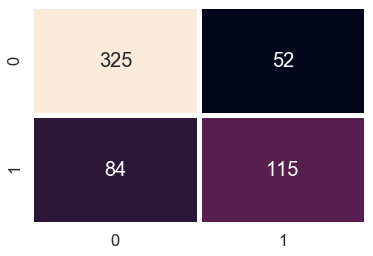

In [197]:

sns.set(font_scale=1.5)

sns.heatmap(cm, annot=True, fmt ='g', annot_kws={"size":20},cbar=False, linewidth=4) 

FPR, TPR, _ = roc_curve(y_train, predictions_train) 

In [199]:
roc_auc = auc(FPR, TPR)
print('ROC AUC: %0.3f' % roc_auc) 

ROC AUC: 0.720


In [200]:
FPR1, TPR1, _1 = roc_curve(y_test, predictions_test)

In [201]:
roc_auc1 = auc(FPR1, TPR1)
print('ROC AUC: %0.3f' % roc_auc1)

ROC AUC: 0.723


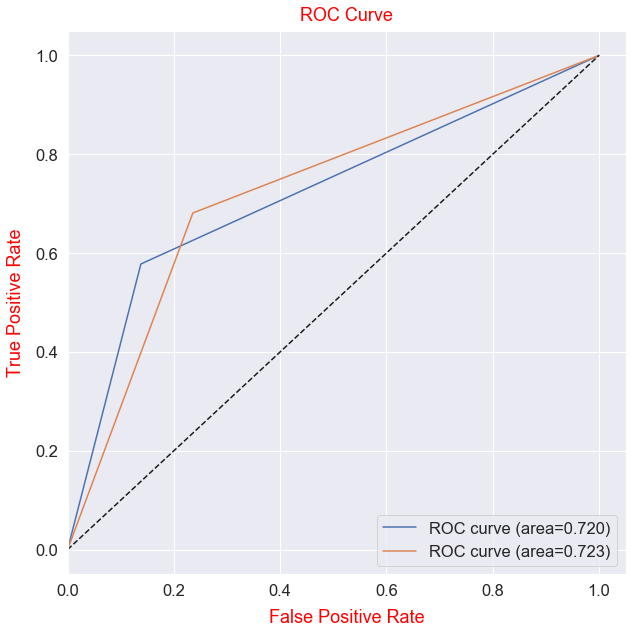

In [202]:
plt.figure(figsize=(10,10))
plt.plot(FPR, TPR , label='ROC curve (area=%0.3f)' % roc_auc)
plt.plot(FPR1, TPR1 , label='ROC curve (area=%0.3f)' % roc_auc1)
plt.plot([0,1],[0,1], 'k--')
plt.xlim(-0.05, 1.0)
plt.xlim(0.0, 1.05)
plt.xlabel('False Positive Rate', color='red',labelpad=10)
plt.ylabel('True Positive Rate', color='red',labelpad=10 )
plt.title('ROC Curve', color='red', pad=10)
plt.legend(loc="lower right")
plt.show()

In [203]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [204]:
cols_with_zeros = ['glucose', 'bloodpressure', 'skinthickness', 'insulin',  'bmi']

In [211]:
for column in X: 
    X[column] = X[column].replace(0, np.NaN)
    mean = int(X[column].mean(skipna=True))
    X[column] = X[column].replace(np.NaN, mean)

C:\Users\School\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\School\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [212]:
model3 = GaussianNB()

In [213]:
model3.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [214]:
y_pred_train1 = model3.predict(X_train)

In [215]:
cm = confusion_matrix(y_train, y_pred_train1)

In [216]:
print(cm)

[[319  58]
 [ 81 118]]


In [219]:
print(classification_report(y_train, y_pred_train1))
print(accuracy_score(y_pred, y_pred_train1))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       377
           1       0.67      0.59      0.63       199

    accuracy                           0.76       576
   macro avg       0.73      0.72      0.73       576
weighted avg       0.75      0.76      0.75       576



TypeError: Expected sequence or array-like, got estimator GaussianNB(priors=None, var_smoothing=1e-09)